
# **EDA : Exploratary Data Analysis**

This notebook deals with EDA of Car Features data set and the respective Price of each car based on those Features
By performing this Data Analysis, many insights can be drawn and can also find any anamolies like outliers can be seen. Also we can see the relationship between multiple columns and target. 

### **EDA basics:**
Basic Data analysis on any data can be started with considering the following sections


1.   Descriptive Statistics
2.   Grouping
3.   ANOVA
4.   Pearson Correlation
5.   Correlation with Heat Maps


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#loading the DataSet

In [52]:
cars_df = pd.read_csv('data.csv')

#find out any cells in the DataSet is missing any values 
Below code prints the columns with total number of NaN values 

In [53]:
cars_df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Seems like the columns Engine Fuel Type, Engine P, No of Doors and Market Category has values missing 

Below lines of codes fixes the missing Numerical and Categorical Data from DataSet

In [54]:
cars_df['Engine HP'] = cars_df['Engine HP'].fillna(round(cars_df['Engine HP'].mean()))

cars_df['Engine Cylinders'] = cars_df['Engine Cylinders'].fillna(round(cars_df['Engine Cylinders'].mean()))

cars_df['Number of Doors'] = cars_df['Number of Doors'].fillna(round(cars_df['Number of Doors'].mean()))

cars_df['Engine Fuel Type'] = cars_df['Engine Fuel Type'].fillna(cars_df['Engine Fuel Type'].mode()[0])
cars_df['Engine HP'] = cars_df['Engine HP'].fillna(cars_df['Engine HP'].mode()[0])

cars_df['Market Category'] = cars_df['Market Category'].fillna(cars_df['Market Category'].mode()[0])

In [55]:
cars_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 1. Descriptive statistical Analysis: 
Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

1. the count of that variable
2. the mean
3. the standard deviation (std)
4. the minimum value
5. the IQR (Interquartile Range: 25%, 50% and 75%)
6. the maximum value



In [56]:
#Df.describe only takes Numerical data columns into consideration
cars_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.383834,5.629763,3.435874,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875196,1.778413,0.881148,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


whereas include = 'all' as a paramter to describe takes every columns including the categorical columns into consideration 

In [57]:
cars_df.describe(include = 'all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11914,11914.000000,11914.000000,11914,11914,11914.000000,11914,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7175,NaN,NaN,8266,4787,NaN,4852,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.383834,5.629763,NaN,NaN,3.435874,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,108.875196,1.778413,NaN,NaN,0.881148,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [58]:
cars_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [59]:
cars_df['Vehicle Size'].value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

In [60]:
drive_wheels_counts = cars_df['Driven_Wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,Driven_Wheels
drive-wheels,
front wheel drive,4787
rear wheel drive,3371
all wheel drive,2353
four wheel drive,1403


In [61]:
model_counts = cars_df['Engine Fuel Type'].value_counts().to_frame()
model_counts.rename(columns={'Engine Fuel Type': 'value_counts'}, inplace=True)
model_counts

,value_counts
regular unleaded,7175
premium unleaded (required),2009
premium unleaded (recommended),1523
flex-fuel (unleaded/E85),899
diesel,154
electric,66
flex-fuel (premium unleaded required/E85),54
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6
natural gas,2


**Visualizing the Analysis through Regression Plots** 

Box plots are better way to visualise the categorical values

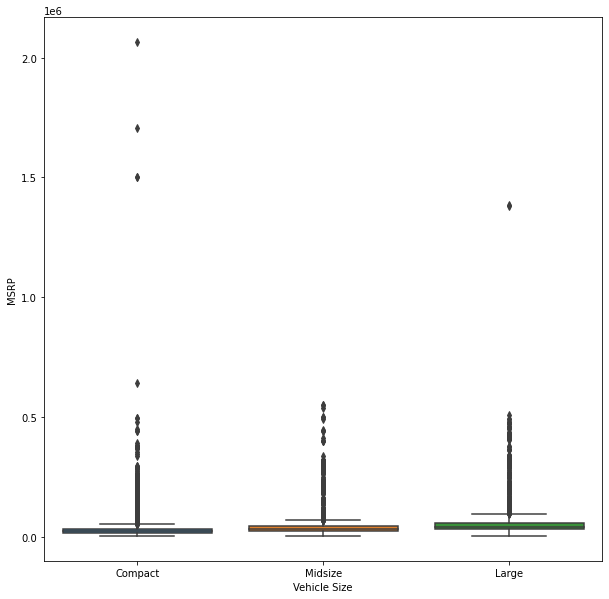

In [62]:
plt.figure(figsize=(10,10))
sns.boxplot(cars_df['Vehicle Size'], cars_df['MSRP'], data = cars_df)

Regplot are used for numerical data in DataSet

(0.0, 2171031.458804115)

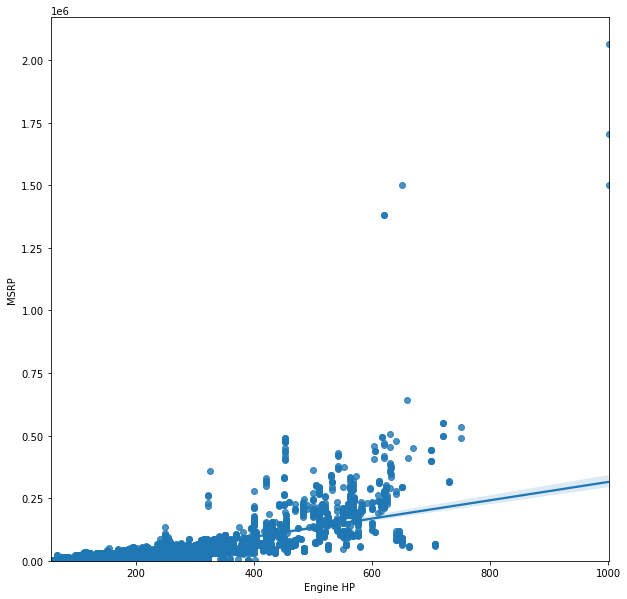

In [63]:
plt.figure(figsize=(10,10))
sns.regplot(x =cars_df['Engine HP'] ,y = cars_df['MSRP'], data = cars_df)
plt.ylim(0,)


The above graph shows there is a positive relationship between Engine HP and MSRP as the HP increases the MSRP increases

(0.0, 2172708.538622674)

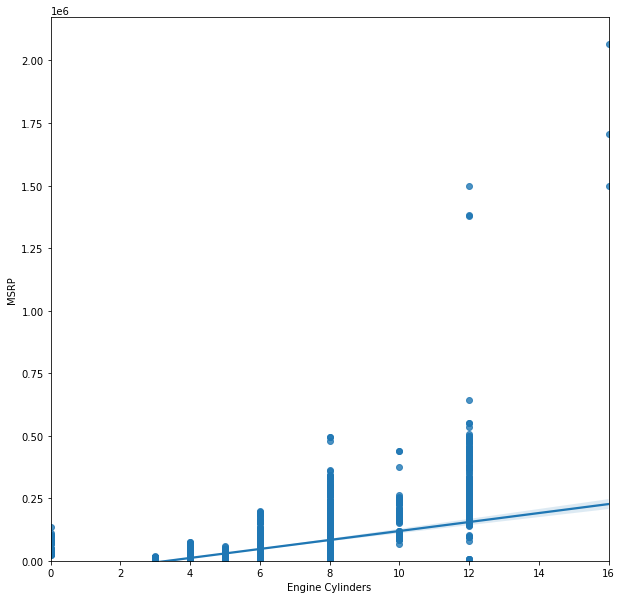

In [64]:
plt.figure(figsize=(10,10))
sns.regplot(x =cars_df['Engine Cylinders'] ,y = cars_df['MSRP'], data = cars_df)
plt.ylim(0,)

the same positive relationship can be seen between Engine cylinders and MSRP.

(0.0, 2189715.5063831303)

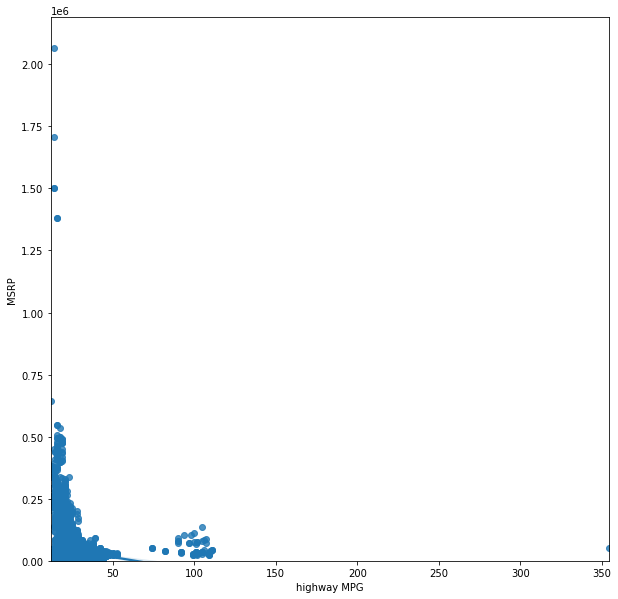

In [65]:
plt.figure(figsize=(10,10))
sns.regplot(x =cars_df['highway MPG'] ,y = cars_df['MSRP'], data = cars_df)
plt.ylim(0,)

Any subject matter expert can say that Mileage plays an important role in price of car but as the regreession plot is as not clear as the above pictures. Still there is a negative relationship between mileage and price as the mileage decreases the price goes up. 

(0.0, 2174851.719812391)

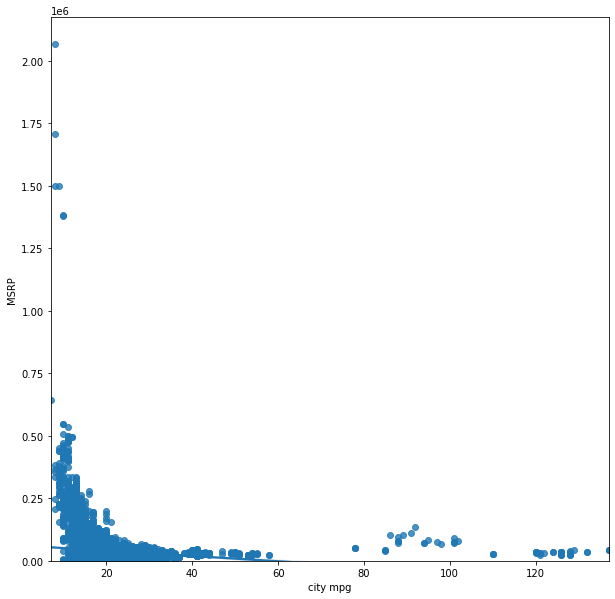

In [66]:
plt.figure(figsize=(10,10))
sns.regplot(x ='city mpg' ,y = 'MSRP', data = cars_df)
plt.ylim(0,)

# 2. Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "driven-wheels". We see that there are 3 different categories of drive wheels.


In [67]:
df_group_one =  cars_df[['Driven_Wheels', 'Engine Fuel Type', 'MSRP']]

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'Engine Fuel Type' and 'price', then assign it to the variable "df_group_one".

In [68]:
df_group_one = df_group_one.groupby(['Driven_Wheels'],as_index=False).mean()
df_group_one

,Driven_Wheels,MSRP
0,all wheel drive,58693.884828
1,four wheel drive,35312.039914
2,front wheel drive,23056.747650
3,rear wheel drive,55064.830317


The above code shows the average price of each 

In [69]:
df_group_one =  cars_df[['Driven_Wheels', 'Engine Fuel Type', 'MSRP']]

In [70]:
df_group_one = df_group_one.groupby(['Driven_Wheels', 'Engine Fuel Type'],as_index=False).mean()
df_group_one

,Driven_Wheels,Engine Fuel Type,MSRP
0,all wheel drive,diesel,55652.460317
1,all wheel drive,electric,90636.363636
2,all wheel drive,flex-fuel (premium unleaded recommended/E85),58228.571429
3,all wheel drive,flex-fuel (premium unleaded required/E85),228254.166667
4,all wheel drive,flex-fuel (unleaded/E85),38182.261905
5,all wheel drive,premium unleaded (recommended),43755.635071
6,all wheel drive,premium unleaded (required),97555.950777
7,all wheel drive,regular unleaded,31769.730348
8,four wheel drive,diesel,79450.000000
9,four wheel drive,flex-fuel (premium unleaded required/E85),104369.500000


In [71]:
df_group_one.max()

Driven_Wheels       rear wheel drive
Engine Fuel Type    regular unleaded
MSRP                          228254
dtype: object

# 3.ANOVA
ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.



In [72]:
grouped_test2=cars_df[['Driven_Wheels', 'MSRP']].groupby(['Driven_Wheels'])
grouped_test2.head(2)

,Driven_Wheels,MSRP
0,rear wheel drive,46135
1,rear wheel drive,40650
17,front wheel drive,2000
18,front wheel drive,2000
19,all wheel drive,2000
21,all wheel drive,2000
481,four wheel drive,37615
482,four wheel drive,34695


In [73]:
grouped_test2.get_group('rear wheel drive')['MSRP']

0         46135
1         40650
2         36350
3         29450
4         34500
          ...  
11901     49700
11902     66350
11903    128000
11904    130000
11905    131500
Name: MSRP, Length: 3371, dtype: int64

In [74]:
# ANOVA
from scipy import stats
f_val, p_val = stats.f_oneway(grouped_test2.get_group('front wheel drive')['MSRP'], 
                              grouped_test2.get_group('rear wheel drive')['MSRP'],
                              grouped_test2.get_group('all wheel drive')['MSRP'],
                              grouped_test2.get_group('four wheel drive')['MSRP'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 296.17052853292216 , P = 1.9102186411900623e-185


F value is high and P values very small as intended which shows there is good relation between Wheels_driven column and price of the car

# 4. Pearson Correaltion 
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1. 1: Total positive linear correlation.
2. 0: No linear correlation, the two variables most likely do not affect each other.
3. -1: Total negative linear correlation.


P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

1. p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
2. the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
3. the p-value is  <  0.1: there is weak evidence that the correlation is significant.
4. the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [75]:
pearson_coef, p_value = stats.pearsonr(cars_df['city mpg'], cars_df['MSRP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.15767572242668287  with a P-value of P = 3.493853598931253e-67


As we have seen before in the Visualisation of city MPG and MSRP shown a negative relationship. The pearson coefficient here shows the negative linear correlation values which is not that strong

In [76]:
pearson_coef, p_value = stats.pearsonr(cars_df['highway MPG'], cars_df['MSRP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.1600426788520263  with a P-value of P = 3.477593360590622e-69


P value is <0.001 which shows stronger correlation 
but the pearson linear correlation is not that strong

In [77]:
pearson_coef, p_value = stats.pearsonr(cars_df['Engine HP'], cars_df['MSRP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6616413888939616  with a P-value of P = 0.0


In [78]:
pearson_coef, p_value = stats.pearsonr(cars_df['Engine Cylinders'], cars_df['MSRP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5311385518158194  with a P-value of P = 0.0


P_ value for Engine HP and Enginer Cylinders is 0 shows a significant correlation
Whereas the linear relationship is not that strong in both cases

# Correlation and Heat Maps


In [79]:
corr = cars_df.corr()

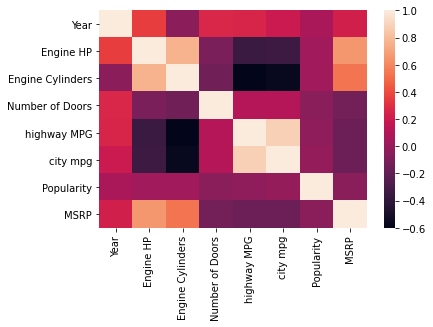

In [80]:
sns.heatmap(corr)

In [81]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = corr[corr.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(3))

Absolute overall correlations
------------------------------
Year                2.413356
Engine HP           3.617524
Engine Cylinders    3.683090
Number of Doors     1.912289
highway MPG         3.395407
city mpg            3.274613
Popularity          1.272134
MSRP                2.913407
dtype: float64 

Weakest correlations
------------------------------
Popularity         1.272134
Number of Doors    1.912289
Year               2.413356
dtype: float64
